W/o preferential

In [42]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random

m0 = 1 # number of nodes in initial condition
m = 1 # number of edges per new node
lst2 = []
def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

# modify this function to make the growth of the network "preferential"
# the input nds is all the nodes in the network
# the output i indicates the node that the new node would connect to
def pref_select(nds):
    global g
    i = uniform(0, len(nds))
    return i

def update():
    global g
    g.count += 1
    if g.count % 2 == 0: # network growth once in every 2 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            del nds[int(j)]
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

def combs():
    lst = []
    nds = list(g.nodes)
    for i in range(len(nds)):
        val = list(g.neighbors(nds[i]))
        lst.append(len(val))
    lst2.append(lst)

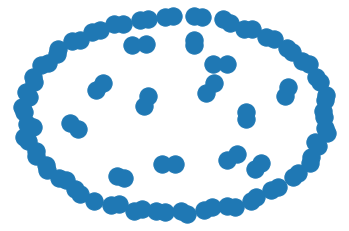

In [45]:
initialize()
for i in range(200):
    if i % 100 == 0:
        observe()
    if i % 10 == 0:
        combs()
    pref_select(list(g.nodes))
    update()
    #rint(i)

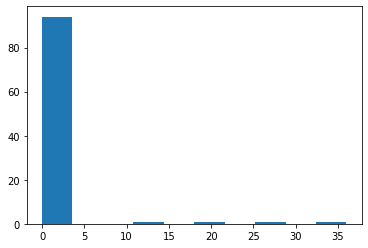

In [77]:
import matplotlib.pyplot as plt
plt.hist(lst2[-1])
plt.show()

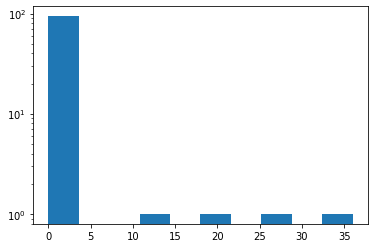

In [78]:
plt.hist(lst2[-1], log = True)
plt.show()

In [34]:
import numpy as np

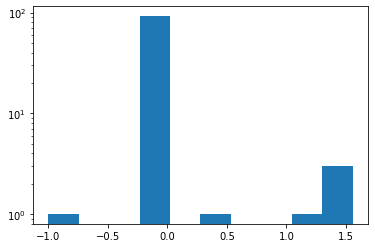

In [79]:
for i in range(len(lst2[-1])):
  if lst2[-1][i] == 0:
    lst2[-1][i] = 0.1
plt.hist(np.log10(lst2[-1]), log = True)
plt.show()

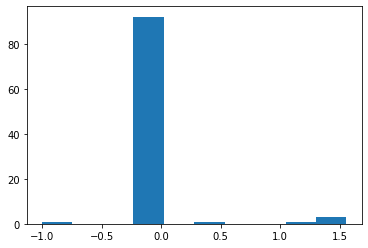

In [80]:
plt.hist(np.log10(lst2[-1]))
plt.show()

In [51]:
np.mean(lst2[-1])

0.9952879581151832

With Preferential

In [74]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random

m0 = 1 # number of nodes in initial condition
m = 1 # number of edges per new node
lst2 = []
def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

# modify this function to make the growth of the network "preferential"
# the input nds is all the nodes in the network
# the output i indicates the node that the new node would connect to
def pref_select(nds):
    global g
    lsta = []
    for i in range(len(nds)):
        val = list(g.neighbors(nds[i]))
        lsta.append(len(val))

    newval = sum(lsta)
    for i in range(len(lsta)):
      lsta[i] = lsta[i]/newval
    baseval = uniform(0, 1)
    count = 0
    for j in range(len(lsta) - 1):
      if baseval < lsta[j]:
        return j
      else:
        count += lsta[j]
        lsta[j + 1] += count
    return uniform(0, len(lsta))

def update():
    global g
    g.count += 1
    if g.count % 2 == 0: # network growth once in every 2 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            del nds[int(j)]
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

def combs():
    lst = []
    nds = list(g.nodes)
    for i in range(len(nds)):
        val = list(g.neighbors(nds[i]))
        lst.append(len(val))
    lst2.append(lst)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars


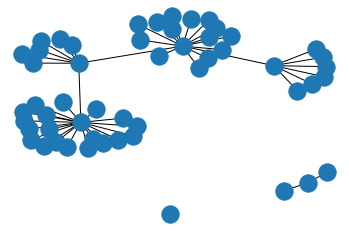

In [75]:
initialize()
for i in range(200):
    if i % 100 == 0:
        observe()
    if i % 10 == 0:
        combs()
    update()

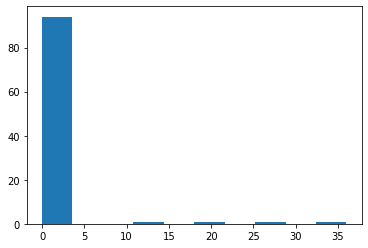

In [76]:
plt.hist(lst2[-1])
plt.show()

In [81]:
np.mean(lst2[-1])

1.9397959183673468

In [82]:
max(lst2[-1])

36

In [105]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random

m0 = 1 # number of nodes in initial condition
m = 1 # number of edges per new node
lst2 = []
alpha = 2
def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

# modify this function to make the growth of the network "preferential"
# the input nds is all the nodes in the network
# the output i indicates the node that the new node would connect to
def pref_select(nds):
    global g
    lsta = []
    for i in range(len(nds)):
        val = list(g.neighbors(nds[i]))
        lsta.append(len(val)**alpha)

    newval = sum(lsta)
    for i in range(len(lsta)):
      lsta[i] = lsta[i]/newval
    baseval = uniform(0, 1)
    count = 0
    for j in range(len(lsta) - 1):
      if baseval < lsta[j]:
        return j
      else:
        count += lsta[j]
        lsta[j + 1] += count
    return uniform(0, len(lsta))

def update():
    global g
    g.count += 1
    if g.count % 2 == 0: # network growth once in every 2 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            del nds[int(j)]
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

def combs():
    lst = []
    nds = list(g.nodes)
    for i in range(len(nds)):
        val = list(g.neighbors(nds[i]))
        lst.append(len(val))
    lst2.append(lst)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars


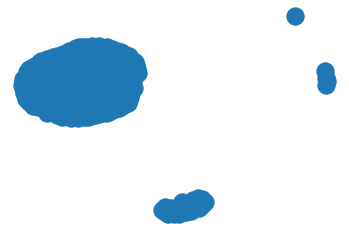

In [106]:
initialize()
for i in range(1000):
    if i % 100 == 0:
        observe()
    if i % 10 == 0:
        combs()
    update()

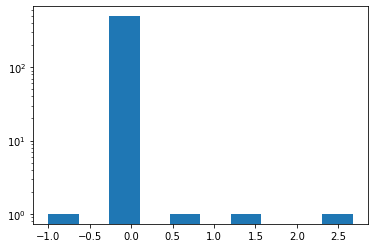

In [107]:
for i in range(len(lst2[-1])):
  if lst2[-1][i] == 0:
    lst2[-1][i] = 0.1
plt.hist(np.log10(lst2[-1]), log = True)
plt.show()

In [108]:
print(np.mean(lst2[-1]))
print(max(lst2[-1]))

1.9841683366733467
470
